In [2]:
import numpy as np
import pandas as pd 
import json
import os

### Importing Data

In [3]:
sb_data = pd.read_csv("C:\\Users\\HarshalSuryawanshi\\OneDrive - Ternpoint Solutions LP\\Documents\\Project X\\Data\\sb_yelp_data.csv")
sb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162283 entries, 0 to 162282
Data columns (total 43 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   review_id              162283 non-null  object 
 1   user_id                162283 non-null  object 
 2   business_id            162283 non-null  object 
 3   stars                  162283 non-null  float64
 4   useful_reviews         162283 non-null  int64  
 5   funny_reviews          162283 non-null  int64  
 6   cool_reviews           162283 non-null  int64  
 7   text                   162283 non-null  object 
 8   date                   162283 non-null  object 
 9   name                   162283 non-null  object 
 10  review_count           162283 non-null  int64  
 11  yelping_since          162283 non-null  object 
 12  useful_user            162283 non-null  int64  
 13  funny_user             162283 non-null  int64  
 14  cool_user              162283 non-nu

In [4]:

null_counts = sb_data.isnull().sum()
print(null_counts)

review_id                     0
user_id                       0
business_id                   0
stars                         0
useful_reviews                0
funny_reviews                 0
cool_reviews                  0
text                          0
date                          0
name                          0
review_count                  0
yelping_since                 0
useful_user                   0
funny_user                    0
cool_user                     0
elite                    130474
friends                   41034
fans                          0
average_stars                 0
compliment_hot                0
compliment_more               0
compliment_profile            0
compliment_cute               0
compliment_list               0
compliment_note               0
compliment_plain              0
compliment_cool               0
compliment_funny              0
compliment_writer             0
compliment_photos             0
name_business                 0
address 

In [5]:
columns = ['hours', 'attributes', 'address', 'friends', 'elite']
sb_data = sb_data.drop(columns = columns)
sb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162283 entries, 0 to 162282
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   review_id              162283 non-null  object 
 1   user_id                162283 non-null  object 
 2   business_id            162283 non-null  object 
 3   stars                  162283 non-null  float64
 4   useful_reviews         162283 non-null  int64  
 5   funny_reviews          162283 non-null  int64  
 6   cool_reviews           162283 non-null  int64  
 7   text                   162283 non-null  object 
 8   date                   162283 non-null  object 
 9   name                   162283 non-null  object 
 10  review_count           162283 non-null  int64  
 11  yelping_since          162283 non-null  object 
 12  useful_user            162283 non-null  int64  
 13  funny_user             162283 non-null  int64  
 14  cool_user              162283 non-nu

In [6]:
import plotly.express as px

# Create a scatter mapbox figure using Plotly Express
fig = px.scatter_mapbox(sb_data,
                        lat="latitude",
                        lon="longitude",
                        text="name_business",
                        hover_name="name_business",
                        hover_data=["city", "state", "stars_business", "review_count_business"],
                        color="stars_business",
                        size="review_count_business",
                        color_continuous_scale=px.colors.sequential.Viridis,
                        size_max=15,
                        zoom=10,
                        mapbox_style="carto-positron")

# Show the figure
fig.show()


### Clustering

c:\Users\HarshalSuryawanshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\HarshalSuryawanshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\HarshalSuryawanshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\HarshalSuryawanshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

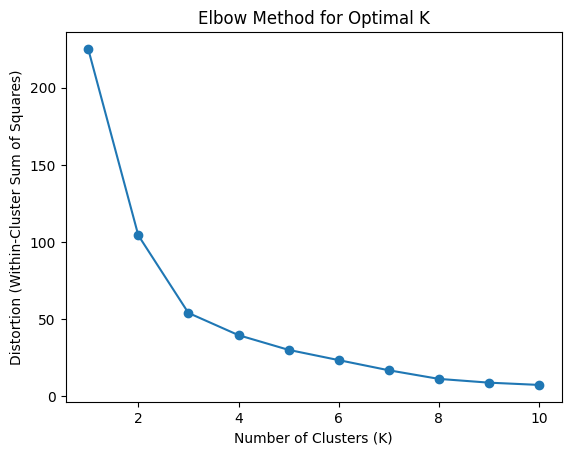

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame with latitude and longitude columns
locations = sb_data[['latitude', 'longitude']]

def find_optimal_k(data, max_k=10):
    distortions = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    return distortions

distortions = find_optimal_k(locations)

# Plot the elbow curve
plt.plot(range(1, len(distortions) + 1), distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Within-Cluster Sum of Squares)')
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

locations = sb_data[['latitude', 'longitude']]

def find_optimal_k_silhouette(data, max_k=4):
    silhouette_scores = []
    for k in range(2, max_k + 1):  # Silhouette score is only defined for k >= 2
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores

silhouette_scores = find_optimal_k_silhouette(locations)

# Plot the silhouette scores
plt.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(sb_data[['latitude', 'longitude']])
sb_data['cluster'] = kmeans.predict(sb_data[['latitude', 'longitude']])
sb_data.head()

c:\Users\HarshalSuryawanshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



review_id                 user_id             business_id  \
0  pUycOfUwM8vqX7KjRRhUEA  59MxRhNVhU9MYndMkz0wtw  gebiRewfieSdtt17PTW6Zg   
1  L0jv8c2FbpWSlfNC6bbUEA  bFPdtzu11Oi0f92EAcjqmg  IDtLPgUrqorrpqSLdfMhZQ   
2  4zopEEPqfwm-c_FNpeHZYw  JYYYKt6TdVA4ng9lLcXt_g  SZU9c8V2GuREDN5KgyHFJw   
3  zM7u3iffMjniyvQAaN9Tnw  QacYrFyCrFLmC726YEEBsA  29YqJwOGEuAWqlHZxMc1OA   
4  Gczff1Qxg4WVmlBLPrZwzQ  cpp89UW0imv45y3a_O444w  34Eqv8jXgxg_EEwcsNgeeg   

   stars  useful_reviews  funny_reviews  cool_reviews  \
0    3.0               0              0             0   
1    5.0               0              0             0   
2    5.0               0              0             0   
3    1.0               0              1             0   
4    5.0               0              0             0   

                                                text                 date  \
0  Had a party of 6 here for hibachi. Our waitres...  2016-07-25 07:31:06   
1  What a great addition to the Funk Zone!  Grab ...  2016-10-13 22:50:47   
2  We were a bit weary about trying the Shellfish...  2016-05-31 02:14:54   
3  So disappointing on so many levels. Have been ...  2012-05-29 03:51:08   
4  We absolutely love everything we have tried he...  2014-05-25 22:33:02   

      name  ...           city state  postal_code   latitude   longitude  \
0      Joe  ...  Santa Barbara    CA        93101  34.416984 -119.695556   
1     Dale  ...  Santa Barbara    CA        93101  34.414445 -119.690672   
2    David  ...  Santa Barbara    CA        93101  34.408715 -119.685019   
3  Guthrie  ...  Santa Barbara    CA        93101  34.420035 -119.696851   
4     Erin  ...  Santa Barbara    CA        93101  34.415114 -119.694497   

   stars_business  review_count_business  is_open  \
0             3.5                    488        1   
1             4.0                    389        1   
2             4.0                   2404        1   
3             3.5                    290        0   
4             4.0                    659        1   

                                          categories  cluster  
0     Steakhouses, Sushi Bars, Restaurants, Japanese        0  
1  Food, Restaurants, Salad, Coffee & Tea, Breakf...        0  
2  Live/Raw Food, Restaurants, Seafood, Beer Bar,...        0  
3  American (Traditional), American (New), Nightl...        0  
4  Health Markets, Coffee & Tea, Ice Cream & Froz...        0  

[5 rows x 39 columns]

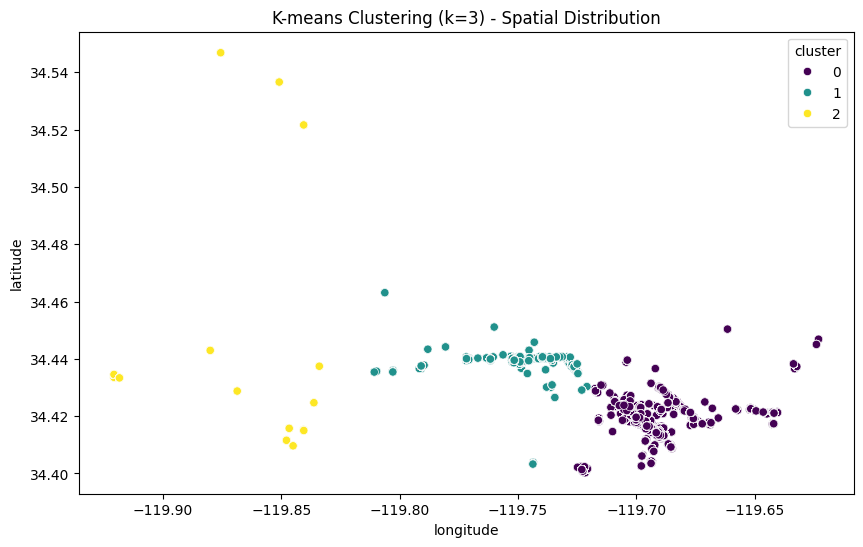

In [ ]:
import seaborn as sns

# Use a scatter plot to visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=sb_data, palette='viridis', legend='full')
plt.title('K-means Clustering (k=3) - Spatial Distribution')
plt.show()

In [ ]:
sb_data['cluster'] = sb_data['cluster'].astype(str)

# Assuming 'sb_data' is your DataFrame with 'latitude', 'longitude', and 'cluster' columns
fig = px.scatter_mapbox(sb_data, 
                        lat='latitude', 
                        lon='longitude', 
                        color='cluster',
                        color_discrete_sequence=['blue', 'green', 'red'],
                        zoom=10)

# Update layout to use Mapbox
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title='K-means Clustering (k=3) - Spatial Distribution')
fig.show()

c:\Users\HarshalSuryawanshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\HarshalSuryawanshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\HarshalSuryawanshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



In [ ]:
import folium
from folium.plugins import MarkerCluster
import numpy as np

def plot_user_and_recommendations_on_map(user_locations, kmeans_model, sb_data):
    # Create a map centered at the mean latitude and longitude of user locations
    map_center = [np.mean([lat for lat, lon in user_locations]), np.mean([lon for lat, lon in user_locations])]
    map_osm = folium.Map(location=map_center, zoom_start=12)

    # Add a MarkerCluster layer for both user locations and recommended restaurants
    user_marker_cluster = MarkerCluster().add_to(map_osm)

    for idx, (lat, lon) in enumerate(user_locations):
        # Add markers for user locations to the user MarkerCluster layer
        folium.Marker([lat, lon],
                      popup=f"User {idx+1}",
                      icon=folium.Icon(color='green')).add_to(user_marker_cluster)

        # Predict the cluster for the current user
        cluster = kmeans_model.predict([[lat, lon]])[0].astype(str)

        # Filter recommended restaurants based on the user's cluster
        recommended_restaurants = sb_data[sb_data['cluster'] == cluster]

        # Sort the recommendations based on stars and review count
        recommended_restaurants = recommended_restaurants.sort_values(by=['stars_business', 'review_count_business'], ascending=[False, False])

        # Take the top 5 recommendations
        top_5_recommendations = recommended_restaurants[['name_business', 'latitude', 'longitude']].drop_duplicates().head(5)

        # Add markers for the recommended restaurants to the map
        recommendation_marker_cluster = MarkerCluster().add_to(map_osm)  # Clear previous recommendations
        for _, restaurant in top_5_recommendations.iterrows():
            folium.Marker([restaurant['latitude'], restaurant['longitude']],
                          popup=f"{restaurant['name_business']}",
                          icon=folium.Icon(color='blue')).add_to(recommendation_marker_cluster)

        # Print the top 5 recommended restaurants
        print(f"\nTop 5 recommended restaurants for User {idx+1}:")
        print(top_5_recommendations[['name_business']])

    # Display the map directly in the notebook
    display(map_osm)

# Example usage
user_locations = [
    (34.416708, -119.719497),
    (34.442973, -119.722970),
    (34.431280, -119.658565)
]

plot_user_and_recommendations_on_map(user_locations, kmeans, sb_data)


c:\Users\HarshalSuryawanshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names




Top 5 recommended restaurants for User 1:
                            name_business
142611                         Buena Onda
13                      Daves Dogs - Cart
130942  Uncorked Wine Tasting and Kitchen
142615                         Oat Bakery
153835               The Daisy Restaurant

Top 5 recommended restaurants for User 2:
                       name_business
23469                   Kin Bakeshop
99375                    Lucca Truck
72947                Lure Fish House
142406                Via Maestra 42
119774  Renaud's Patisserie & Bistro


c:\Users\HarshalSuryawanshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

c:\Users\HarshalSuryawanshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names




Top 5 recommended restaurants for User 3:
                            name_business
142611                         Buena Onda
13                      Daves Dogs - Cart
130942  Uncorked Wine Tasting and Kitchen
142615                         Oat Bakery
153835               The Daisy Restaurant


### Collaborative Filtering Recommendation System

#### Super Score for Users

In [ ]:
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd



# Function to calculate polarity score using TextBlob
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Function to calculate VADER score
def get_vader_score(text):
    sid = SentimentIntensityAnalyzer()
    compound_score = sid.polarity_scores(text)['compound']
    return compound_score

# Load your dataset (assuming sb_data is already loaded)

# Calculate polarity and VADER scores
sb_data['polarity_score'] = sb_data['text'].apply(get_polarity)
sb_data['vader_score'] = sb_data['text'].apply(get_vader_score)

# Calculate Super Score as a combination of polarity, VADER, and review ratings
sb_data['super_score'] = (
    (sb_data['polarity_score'] + 1) / 2 * 2 +  # Normalize polarity score to [0, 2]
    (sb_data['vader_score'] + 1) / 2 * 2 +     # Normalize VADER score to [0, 2]
    sb_data['stars']                            # Use review ratings as is
) / 3  # Average the normalized scores

# Now sb_data contains the 'Super Score'


In [ ]:
sb_data = pd.read_csv("C:\\Users\\HarshalSuryawanshi\\OneDrive - Ternpoint Solutions LP\\Documents\\Project X\\Data\\yelp_new.csv")
sb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162283 entries, 0 to 162282
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   review_id              162283 non-null  object 
 1   user_id                162283 non-null  object 
 2   business_id            162283 non-null  object 
 3   stars                  162283 non-null  float64
 4   useful_reviews         162283 non-null  int64  
 5   funny_reviews          162283 non-null  int64  
 6   cool_reviews           162283 non-null  int64  
 7   text                   162283 non-null  object 
 8   date                   162283 non-null  object 
 9   name                   162283 non-null  object 
 10  review_count           162283 non-null  int64  
 11  yelping_since          162283 non-null  object 
 12  useful_user            162283 non-null  int64  
 13  funny_user             162283 non-null  int64  
 14  cool_user              162283 non-nu

In [ ]:


# Step 1: Create User-Item Matrix
def create_user_item_matrix(data):
    user_item_matrix = data.pivot_table(index='user_id', columns='name_business', values='super_score', fill_value=0)
    return user_item_matrix

user_item_matrix = create_user_item_matrix(sb_data)

# Step 2: Truncated SVD
n_components = 10  

# Convert the user_item_matrix to dense array
user_item_matrix_dense = user_item_matrix.to_numpy()

# Use randomized SVD to handle sparse matrices
U, Sigma, VT = randomized_svd(user_item_matrix_dense, n_components=n_components)

# Step 3: Create Item-Item Matrix based on Cosine Similarity
item_item_matrix = pd.DataFrame(cosine_similarity(VT.T), index=user_item_matrix.columns, columns=user_item_matrix.columns)

def cf_recommender(restaurant):
    """Getting the correlation of a specific restaurant with other Restaurants"""
    restaurant_ratings = item_item_matrix[restaurant]
    similar_restaurant_ratings = item_item_matrix.corrwith(restaurant_ratings)
    corr_ratings = pd.DataFrame(similar_restaurant_ratings, columns=['Correlation'])
    corr_ratings.dropna(inplace=True)
    
    """Filtering for positively correlated restaurants"""
    ratings_sim = item_item_matrix[restaurant]
    ratings_sim = ratings_sim[ratings_sim > 0]
    
    """Generate Top 10 Recommended Restaurants"""
    """Exclude the top row as that will be the same restaurant"""
    return ratings_sim.sort_values(ascending=False).head(11)[1:]



In [ ]:
# Print unique restaurant names in your dataset
unique_restaurant_names = sb_data['name_business'].unique()
print("Unique Restaurant Names:")
print(unique_restaurant_names)


Unique Restaurant Names:
['Hibachi Steak House & Sushi Bar' 'Helena Avenue Bakery'
 'Santa Barbara Shellfish Company' 'Paradise Cafe' 'Backyard Bowls'
 'Our Daily Bread' 'Plaza Deli' 'Cold Spring Tavern'
 'University Club of Santa Barbara' 'Daves Dogs - Cart' 'Ichiban'
 'Pizza Mizza' 'Dawn Patrol' 'Tuttini' 'Zen Yai Thai Cuisine'
 "Maggie's at State and A" 'Breakfast Culture Club' 'Terraza Cafe'
 "Wahoo's Fish Tacos" 'Taqueria Cuernavaca' 'Sushi Tyme'
 'Sakana Sushi Bar & Japanese' 'Cafe Buenos Aires' "Yoichi's"
 'Chipotle Mexican Grill' 'Taqueria El Pastorcito' 'Meun Fan Thai Cafe'
 'Brummis - the German Taste' 'Chase Restaurant' 'Due Lune Cucina'
 'Farmer Boy' 'Epiphany Restaurant' 'Barbarians' 'East Beach Grill'
 'Islands Restaurant' 'Our Lady of Guadalupe Mercado' 'Caffe Primo'
 'India House' 'Mad Dogs' 'Intermezzo By Wine Cask'
 'China Bowl & State Street Cafe' "TonyRay's Restaurant & Cantina"
 "Marty's Pizza" 'Hob Nob' 'IHOP' 'Taqueria Rincon Alteno' "Oliver's"
 'State & A Bar an

In [ ]:
test_restaurant_name = "Zen Yai Thai Cuisine"

recommended_restaurants = cf_recommender(test_restaurant_name)
print("Recommended Restaurants:")
print(recommended_restaurants)

Recommended Restaurants:
name_business
Marmalade Cafe                               0.995282
Dargan's Irish Pub & Restaurant              0.989048
Shintori Sushi Factory                       0.988206
Arnoldi's Cafe                               0.987835
South Coast Deli- Chapala                    0.987627
Cantwell's Market & Deli                     0.987609
Los Arroyos Mexican Restaurant & Take Out    0.987240
Romanti-Ezer                                 0.986489
South Coast Deli- Carrillo                   0.986308
China Pavilion                               0.985046
Name: Zen Yai Thai Cuisine, dtype: float64
